<a href="https://colab.research.google.com/github/sarahsufi/Economic-Indicators--Linear-Regression/blob/main/Economic_Indicators_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
#Import Dataset
file_path = '/kaggle/input/economic-indicators-gdp-and-gini-index/EconomicData.csv'
df = pd.read_csv(file_path)

In [ ]:
#Overview of the data
df.head()

,Region,GDP Per Capita,Gini Index,Gross Domestic Product (GDP)
0,Afghanistan,479,NaN,NaN
1,Albania,$4.2K,0.332,$18.9B
2,Algeria,$3.5K,0.276,$191.9B
3,Andorra,$35.7K,NaN,$3.4B
4,Angola,$2.9K,0.513,$106.7B


In [ ]:
# Function to convert currency strings to float
def currency_to_float(currency_str):
    if isinstance(currency_str, str):
        currency_str = currency_str.replace(',', '').replace('$', '')
        if 'K' in currency_str:
            return float(currency_str.replace('K', '')) * 1e3
        elif 'M' in currency_str:
            return float(currency_str.replace('M', '')) * 1e6
        elif 'B' in currency_str:
            return float(currency_str.replace('B', '')) * 1e9
        elif 'T' in currency_str:
            return float(currency_str.replace('T', '')) * 1e12
    return float(currency_str)

# Convert GDP columns to numeric types
df['GDP Per Capita'] = df['GDP Per Capita'].apply(currency_to_float)
df['Gross Domestic Product (GDP)'] = df['Gross Domestic Product (GDP)'].apply(currency_to_float)

In [ ]:
# Check for missing values
df.isnull().sum()


Region                           0
GDP Per Capita                   0
Gini Index                      46
Gross Domestic Product (GDP)    33
dtype: int64

In [ ]:
# Drop rows with missing values
df.dropna(inplace=True)

In [ ]:
df.describe()

,GDP Per Capita,Gini Index,Gross Domestic Product (GDP)
count,152.000000,152.000000,1.520000e+02
mean,11276.217105,0.381974,6.303156e+11
std,16813.704628,0.080761,2.586934e+12
min,217.000000,0.246000,6.030000e+07
25%,1300.000000,0.327000,1.562500e+10
50%,4100.000000,0.364500,5.810000e+10
75%,12400.000000,0.426500,3.795000e+11
max,89500.000000,0.630000,2.550000e+13


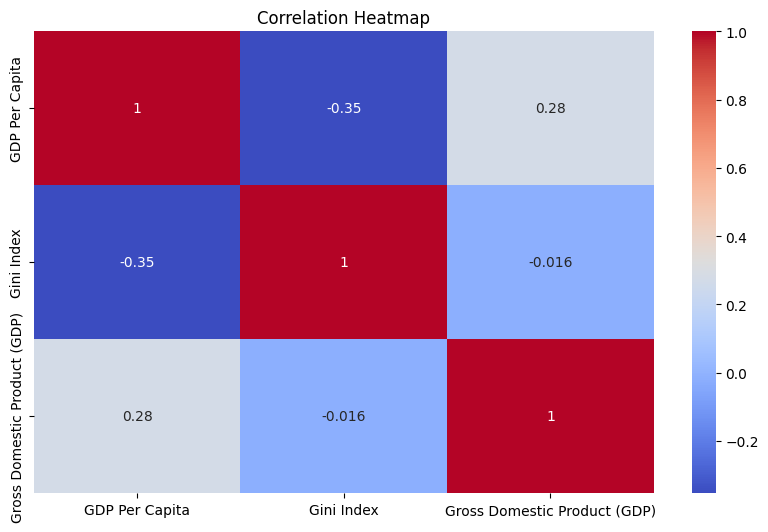

In [ ]:
numeric_df = df.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

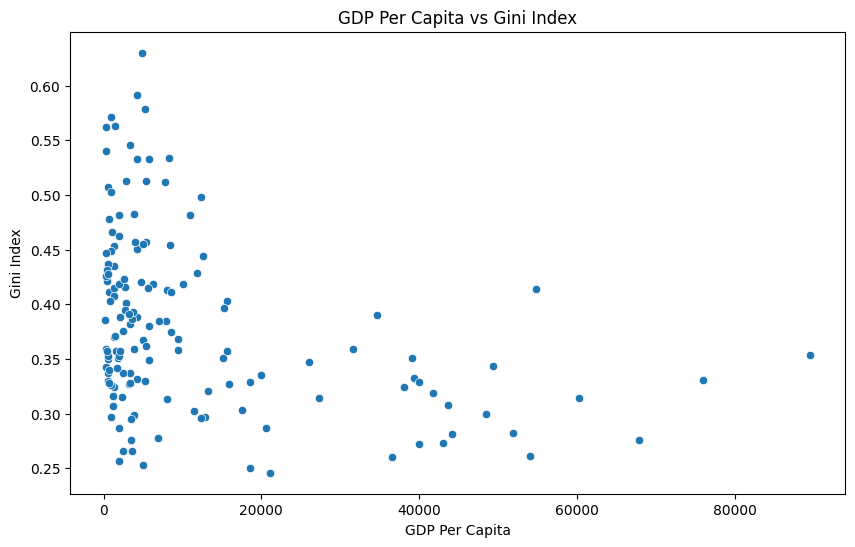

In [ ]:
# Scatter plot of GDP Per Capita vs Gini Index
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GDP Per Capita', y='Gini Index', data=df)
plt.title('GDP Per Capita vs Gini Index')
plt.xlabel('GDP Per Capita')
plt.ylabel('Gini Index')
plt.show()

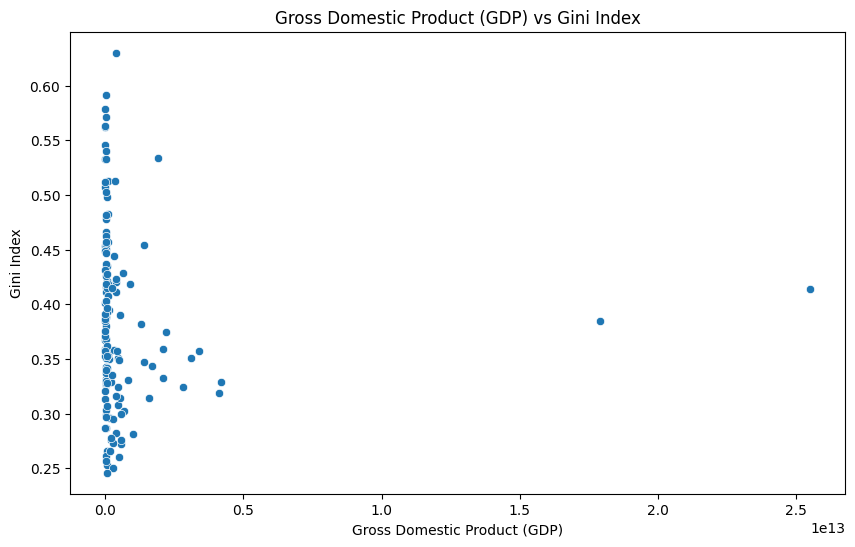

In [ ]:
# Scatter plot of Gross Domestic Product (GDP) vs Gini Index
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gross Domestic Product (GDP)', y='Gini Index', data=df)
plt.title('Gross Domestic Product (GDP) vs Gini Index')
plt.xlabel('Gross Domestic Product (GDP)')
plt.ylabel('Gini Index')
plt.show()

In [ ]:
# Prepare the data for modeling
X = df[['GDP Per Capita', 'Gross Domestic Product (GDP)']]
y = df['Gini Index']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Train a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions
y_pred = model.predict(X_test)

In [ ]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2

(0.0058311389230295795, 0.10351509988500229)